**Trying for multiple values**


0
1
2
3
4
5
6
7
8
9
Total Time elapsed = 47.88685631752014
Average time elapsed per datapoint = 4.788685631752014
Time elapsed for approach 1= 24.456206560134888
Average time elapsed per datapoint = 168109825.1579436
Time elapsed for approach 2= 23.417930126190186
Average time elapsed per datapoint = 168109825.37731665
Weight values at 95% confidence are given as [0.28208834, 0.43739582, 0.2824404]
The trend is as follows:
Probability of Satistfaction==PoS
Wi=Weight of investment instrument i


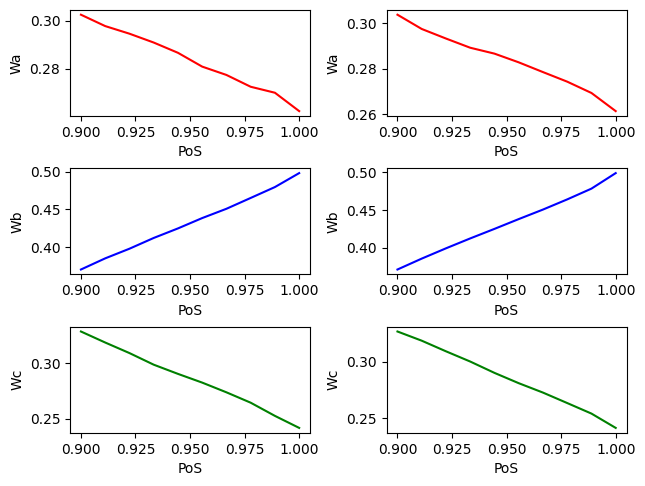

In [3]:

################################################################################
  
                              #Importing files#

import numpy as np
from scipy.optimize import minimize as mincon
from scipy.optimize import NonlinearConstraint as nlc
from scipy.optimize import LinearConstraint as lc
import scipy.stats as ss
import matplotlib.pyplot as plt
import time

################################################################################
time1=np.zeros(10)
time2=np.zeros(10)

st = time.time()

              

################################################################################
  
                              #Problem Definition#
# Define the problem data
rps = np.array([0.1, 0.08, 0.12])                             # Mean expected returns
V = np.array([[0.05**2, 0.05*0.03*0.5, -0.05*0.06*0.2],
                  [0.05*0.03*0.5, 0.03**2, 0.03*0.06*0.3],
                  [-0.05*0.06*0.2, 0.03*0.06*0.3, 0.06**2]])  # Writing the covariance matrix V using correlation coefficient matrix

################################################################################
outputs1=np.zeros([10,3])
outputs2=np.zeros([10,3])

for i in range(90,100):
        zval=ss.norm.ppf(i/100)

################################################################################
                          # Problem Formulation #




        def objective1(w): 
            G=1000*np.eye(3)    
            N=V*G                                        #Writing objective function in accordance with sharpe number
            y=np.dot(np.matmul(w.T,N),w)
            return y

        def objective2(w): 
            k1=0.5  
            k2=0.5
            G=1000*np.eye(3)    
            N=V*G                                        #Writing objective function in accordance with sharpe number
            y2=np.dot(np.matmul(w.T,N),w)
            y1=np.sqrt(1000)*np.dot(w,c1)
            y=k1*y1+k2*y2
            return y

        c1=np.array([0.1,0.08,0.12])
        c2=np.diag([25,9,36])

        def constraint1(w):                                           # Define the nonlinear constraint
            p1=np.dot(w,c1)
            p2=np.dot(np.dot(w.T,c2),w)
            z=0.09-p1+0.01*zval*np.sqrt(p2)
            return z


        linear_constraint = lc([[1, 1,1]], [1], [1])                  # Define the Linear constraint



        constraints = [linear_constraint,nlc(constraint1, -np.inf, 0)] #Overall Constraints


        w0 = [0.3, 0.4,0.3]                                            # Defined the initial guess
################################################################################



################################################################################

                          #Solving the problem#
        st1=time.time()
        res1 = mincon(objective1, w0, method='trust-constr', constraints=constraints)     # Solving the resulting nonlinear optimization problem using trust region constrained algorithm available in scipy.optimize 
        et1=time.time() 
        st2=time.time()      
        res2 = mincon(objective2, w0, method='trust-constr', constraints=constraints)     # Solving the resulting nonlinear optimization problem using trust region constrained algorithm available in scipy.optimize 

        et2=time.time()
        time1[i-90]=et1-st1
        time2[i-90]=et2-st2
        outputs1[i-90,:]=res1.x
        outputs2[i-90,:]=res2.x

        print(i-90)
################################################################################


et = time.time()
elapsed=et-st
print('Total Time elapsed = {}'.format(elapsed))
print('Average time elapsed per datapoint = {}'.format(elapsed/10))

print('Time elapsed for approach 1= {}'.format(np.sum(time1)))
print('Average time elapsed per datapoint = {}'.format(et1/10))

print('Time elapsed for approach 2= {}'.format(np.sum(time2)))
print('Average time elapsed per datapoint = {}'.format(et2/10))
################################################################################
                           #Results#


print('Weight values at 95% confidence are given as {}'.format([0.28208834,0.43739582,0.2824404]))    

print('The trend is as follows:')
fig,ax=plt.subplots(3,2)
x=np.linspace(.900,1.000,10)


print('Probability of Satistfaction==PoS')
print('Wi=Weight of investment instrument i')

ax[0,0].plot(x,outputs1[:,0],'r')
ax[0,0].set_xlabel('PoS')
ax[0,0].set_ylabel('Wa')


ax[1,0].plot(x,outputs1[:,1],'b')
ax[1,0].set_xlabel('PoS')
ax[1,0].set_ylabel('Wb')


ax[2,0].plot(x,outputs1[:,2],'g')
ax[2,0].set_xlabel('PoS')
ax[2,0].set_ylabel('Wc')

ax[0,1].plot(x,outputs2[:,0],'r')
ax[0,1].set_xlabel('PoS')
ax[0,1].set_ylabel('Wa')


ax[1,1].plot(x,outputs2[:,1],'b')
ax[1,1].set_xlabel('PoS')
ax[1,1].set_ylabel('Wb')


ax[2,1].plot(x,outputs2[:,2],'g')
ax[2,1].set_xlabel('PoS')
ax[2,1].set_ylabel('Wc')

################################################################################


#Please note that a warning may come that Check if the approximated function is linear. cont...
#If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations. cont...
# warn('delta_grad == 0.0.

#However this is perfectly fine as our objective function is not linear in nature but quadratic and hence better results are not possible in a real setting
fig.tight_layout(pad=0.5)


